In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib as mpl
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen, add_image
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import urllib
import os
from unidecode import unidecode

# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
col1 = '#ff4b44'
col2 = '#00a0de'

In [2]:
df = pd.read_csv("D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

In [118]:
def keypass(pname):
    dfp = df[df['name']==pname]
    kp = dfp[dfp['qualifiers'].str.contains('KeyPass')]
    bcc = dfp[dfp['qualifiers'].str.contains('BigChanceCreated')]
    assist = dfp[dfp['qualifiers'].str.contains('IntentionalGoalAssist')]
    no_carry = df[df['type']!='Carry']
    # pre_asst = no_carry[(no_carry['qualifiers'].shift(-1).str.contains('IntentionalGoalAssist')) & (no_carry['type']=='Pass') & 
    #                        (no_carry['outcomeType']=='Successful') &  (no_carry['name']==pname)]
    Thr_ball = dfp[dfp['qualifiers'].str.contains('Throughball')]
    Thr_ball_acc = Thr_ball[Thr_ball['outcomeType']=='Successful']
    return {'Name': pname, 'Keypass': len(kp), 'Assists': len(assist), 'BigChancesCreated': len(bcc), 'Acc_ThroughPass': len(Thr_ball_acc)}

names = df['name'].unique()
list = []
for pname in names:
    kp_stats = keypass(pname)
    list.append(kp_stats)

kp_df = pd.DataFrame(list)

In [119]:
kp_df = kp_df.sort_values(by='Assists', ascending=False).reset_index(drop=True)
kp_df['Keypass_rank'] = kp_df['Keypass'].rank(method='dense', ascending=False).astype(int)
kp_df['Assists_rank'] = kp_df['Assists'].rank(method='dense', ascending=False).astype(int)
kp_df['BigChancesCreated_rank'] = kp_df['BigChancesCreated'].rank(method='dense', ascending=False).astype(int)
# kp_df['Pre_Assists_rank'] = kp_df['Pre_Assists'].rank(method='dense', ascending=False).astype(int)
kp_df['Acc_ThroughPass_rank'] = kp_df['Acc_ThroughPass'].rank(method='dense', ascending=False).astype(int)
kp_df

Name  Keypass  Assists  BigChancesCreated  \
0                   Alex Baena       84       12                 17   
1                   Iago Aspas       90        9                 21   
2                Nico Williams       47        9                 10   
3                     Raphinha       41        9                 11   
4                        Savio       50        8                 13   
5                 Artem Dovbyk       27        8                 10   
6                   Toni Kroos       62        7                  9   
7               Ilkay Gundogan       97        7                 15   
8                   Diego Rico       39        7                  8   
9             Miguel Gutierrez       42        7                 21   
10             Mason Greenwood       36        6                  8   
11           Federico Valverde       50        5                  9   
12             Jude Bellingham       48        5                  7   
13            Rodrigo Riquelme       28        5                 10   
14                   Yan Couto       27        5                  7   
15               Lucas Vazquez       30        5                  9   
16            Viktor Tsygankov       28        5                  9   
17                 Brahim Diaz       30        5                  9   
18                 Jesus Areso       36        5                  5   
19           Antoine Griezmann       43        5                 10   
20              Gorka Guruzeta       27        5                  5   
21                Brais Mendez       40        5                  9   
22             Rodrigo De Paul       39        5                 11   
23               Gerard Moreno       53        5                  9   
24           Alexander Sorloth       34        5                  5   
25                 Saul Niguez       14        5                  7   
26                Sergi Darder       51        5                  8   
27             Largie Ramazani       24        5                 10   
28                        Isco       81        4                 12   
29                 Samuel Lino       34        4                 10   
30             Lucas Robertone       34        4                  5   
31               Takefusa Kubo       58        4                 10   
32               Adria Pedrosa       27        4                  9   
33                       Portu       18        4                  7   
34                        Suso       42        4                  8   
35              Carlos Vicente       33        4                  8   
36                 Sergio Ruiz       12        4                  3   
37                Manu Sanchez       20        4                  6   
38             Oscar De Marcos       21        4                  5   
39                        Koke       26        4                  7   
40             Marcos Llorente       27        4                 11   
41                Aleix Garcia       58        4                 11   
42                Joao Cancelo       35        4                 11   
43                 Dani Parejo       34        4                  5   
44              Jonathan Viera       45        4                  7   
45                Johan Mojica       25        3                  6   
46                 Luka Modric       55        3                 12   
47            Alejandro Catena        6        3                  4   
48                  Fran Perez       19        3                  6   
49                   Alex Sola       27        3                  4   
50               Lucas Ocampos       36        3                 10   
51              Gonzalo Villar       13        3                  2   
52             Mikel Oyarzabal       21        3                  4   
53             Alfonso Pedraza       20        3                  6   
54        Jorgen Strand Larsen       24        3                  5   
55               Alvaro Morata       15        3  

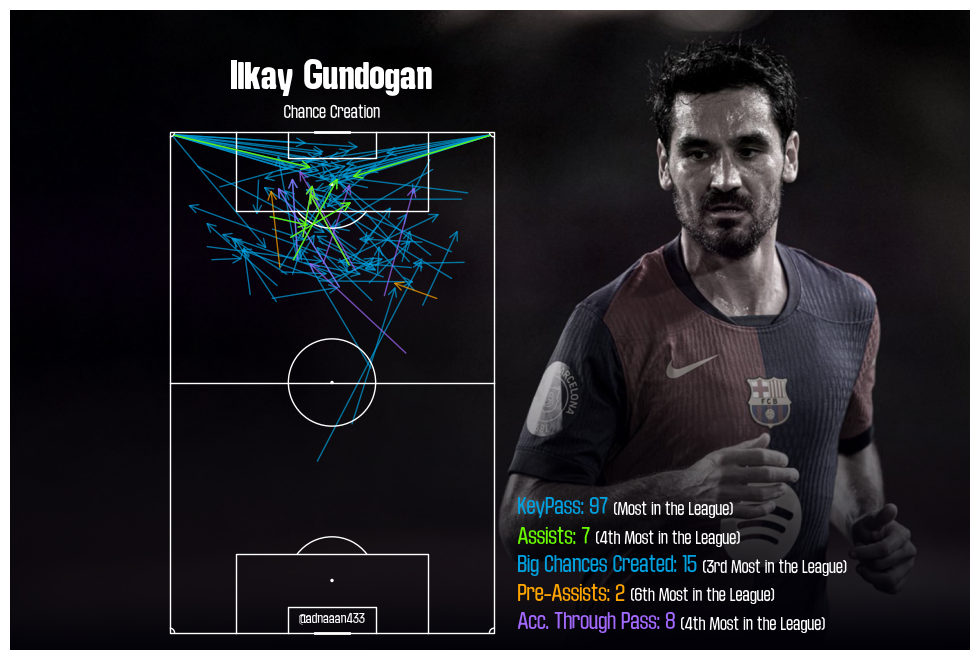

In [122]:
def plot_top_assist(ax,pname):
    dfp = df[df['name']==pname]
    kp = dfp[dfp['qualifiers'].str.contains('KeyPass')]
    assist = dfp[dfp['qualifiers'].str.contains('IntentionalGoalAssist')]
    bcc = dfp[dfp['qualifiers'].str.contains('BigChanceCreated')]
    no_carry = df[df['type']!='Carry']
    pre_asst = no_carry[(no_carry['qualifiers'].shift(-1).str.contains('IntentionalGoalAssist')) & (no_carry['type']=='Pass') & 
                           (no_carry['outcomeType']=='Successful') &  (no_carry['name']==pname)]
    Thr_ball = dfp[dfp['qualifiers'].str.contains('Throughball')]
    Thr_ball_acc = Thr_ball[Thr_ball['outcomeType']=='Successful']
    
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='None', line_color='w', linewidth=1, corner_arcs=True, line_zorder=5)
    pitch.draw(ax=ax)
    for index, row in assist.iterrows():
        arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', color=green, zorder=5, mutation_scale=15, 
                                        alpha=0.9, linewidth=1)
        ax.add_patch(arrow)
    for index, row in kp.iterrows():
        arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', color=col2, zorder=2, mutation_scale=15, 
                                        alpha=0.7, linewidth=1)
        ax.add_patch(arrow)
    for index, row in pre_asst.iterrows():
        arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', color='orange', zorder=3, mutation_scale=15, 
                                        alpha=0.7, linewidth=1)
        ax.add_patch(arrow)
    for index, row in Thr_ball_acc.iterrows():
        arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', color=violet, zorder=4, mutation_scale=15, 
                                        alpha=0.7, linewidth=1)
        ax.add_patch(arrow)

    custom_font = FontProperties(fname="C:\Fonts\LaLigaBold-Bold.otf")
    ax.text(34, 114, f'{pname}', color='w', fontsize=15, fontproperties=custom_font, ha='center')
    
    custom_font = FontProperties(fname="C:\Fonts\LaLigaThin.otf")
    ax.text(34, 108, f'Chance Creation', color='w', fontsize=10, fontproperties=custom_font, ha='center', fontweight='bold')
    
    ax_text(-5, 24, s=f'<KeyPass: {len(kp)}> <(Most in the League)>', color=col2, fontsize=13, ha='left', va='bottom', 
            fontproperties=custom_font, highlight_textprops=[{'color': col2}, {'color': 'w', 'fontsize': 10}], ax=ax)
    ax_text(-5, 18, s=f'<Assists: {len(assist)}> <(4th Most in the League)>', color=green, fontsize=13, ha='left', va='bottom', 
            fontproperties=custom_font, highlight_textprops=[{'color': green}, {'color': 'w', 'fontsize': 10}], ax=ax)
    ax_text(-5, 12, s=f'<Big Chances Created: {len(bcc)}> <(3rd Most in the League)>', color=col2, fontsize=13, ha='left', va='bottom', 
            fontproperties=custom_font, highlight_textprops=[{'color': col2}, {'color': 'w', 'fontsize': 10}], ax=ax)
    ax_text(-5, 6, s=f'<Pre-Assists: {len(pre_asst)}> <(6th Most in the League)>', color='orange', fontsize=13, ha='left', va='bottom', 
            fontproperties=custom_font, highlight_textprops=[{'color': 'orange'}, {'color': 'w', 'fontsize': 10}], ax=ax)
    ax_text(-5, 0, s=f'<Acc. Through Pass: {len(Thr_ball_acc)}> <(4th Most in the League)>', color=violet, fontsize=13, ha='left', va='bottom', 
            fontproperties=custom_font, highlight_textprops=[{'color': violet}, {'color': 'w', 'fontsize': 10}], ax=ax)

    IMAGE_URL = 'file:///D:/FData/LaLiga_Analysis/Gundogan/Gundogan_bg.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = add_image(image, fig, left=0.11, bottom=-0.03, width=1.2, height=1.2)
    ax.set_zorder(1)
    ax_image.set_zorder(0)

    ax.text(34, 3, '@adnaaan433', fontsize=8, color='w', ha='center', va='center', fontproperties=custom_font)
    return

fig,ax=plt.subplots(figsize=(8,7))
plot_top_assist(ax,'Ilkay Gundogan')

In [116]:
def BallProgression(pname):
    dfpass = df[(df['type']=='Pass') & (df['name']==pname)]
    df_carry = df[(df['type']=='Carry') & (df['name']==pname)]
    acc_pass = dfpass[dfpass['outcomeType']=='Successful']
    pro_pass = acc_pass[(acc_pass['prog_pass']>=9.11) & (acc_pass['x']>=35) &
                        (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    pro_carry = df_carry[(df_carry['prog_carry']>=9.11) & (df_carry['x']>=35)]
    Thr_ball = dfpass[(dfpass['qualifiers'].str.contains('Throughball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Thr_ball_acc = Thr_ball[Thr_ball['outcomeType']=='Successful']
    lngball = dfpass[(dfpass['qualifiers'].str.contains('Longball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    lngball_acc = lngball[lngball['outcomeType']=='Successful']
    
    return {'Name': pname, 
            'ProgressivePass': len(pro_pass),
            'ProgressiveCarry': len(pro_carry),
            'AccurateThroughPass': len(Thr_ball_acc),
            'AccurateLongballs': len(lngball_acc)}

# names = df['name'].unique()
names = df[df['teamName']=='Barcelona']['name'].unique()
list = []
for pname in names:
    bp_stats = BallProgression(pname)
    list.append(bp_stats)

bp_df = pd.DataFrame(list)

In [ ]:
bp_df = bp_df.sort_values(by='ProgressivePass', ascending=False).reset_index(drop=True)
bp_df['ProgressivePass_rank'] = bp_df['ProgressivePass'].rank(method='dense', ascending=False).astype(int)
bp_df['ProgressiveCarry_rank'] = bp_df['ProgressiveCarry'].rank(method='dense', ascending=False).astype(int)
bp_df['AccurateThroughPass_rank'] = bp_df['AccurateThroughPass'].rank(method='dense', ascending=False).astype(int)
bp_df['AccurateLongballs_rank'] = bp_df['AccurateLongballs'].rank(method='dense', ascending=False).astype(int)
bp_df

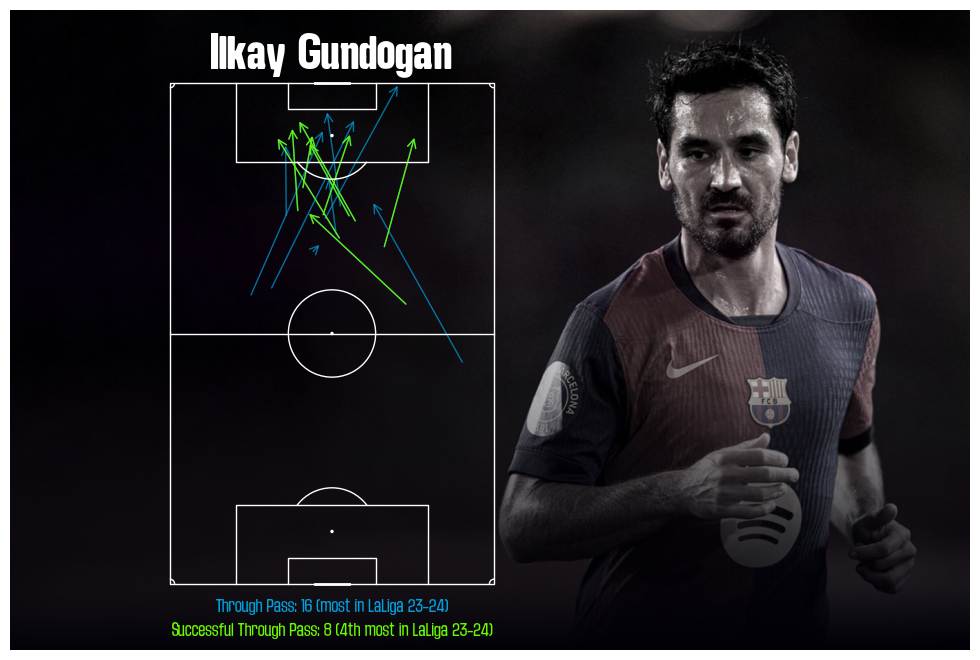

In [68]:
def plot_top_thrball(ax,pname):
    dfp = df[df['name']==pname]
    thb = dfp[dfp['qualifiers'].str.contains('Throughball')]
    thbs = thb[thb['outcomeType']=='Successful']
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='None', line_color='w', linewidth=1, corner_arcs=True, line_zorder=5)
    pitch.draw(ax=ax)
    for index, row in thbs.iterrows():
        arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', color=green, zorder=4, mutation_scale=15, 
                                        alpha=0.9, linewidth=1)
        ax.add_patch(arrow)
    for index, row in thb.iterrows():
        arrow = patches.FancyArrowPatch((row['y'], row['x']), (row['endY'], row['endX']), arrowstyle='->', color=col2, zorder=3, mutation_scale=15, 
                                        alpha=0.7, linewidth=1)
        ax.add_patch(arrow)

    custom_font = FontProperties(fname="C:\Fonts\LaLigaBold-Bold.otf")
    ax.text(34, 108, f'{pname}', color='w', fontsize=18, fontproperties=custom_font, ha='center', fontweight='bold')
    custom_font = FontProperties(fname="C:\Fonts\LaLigaThin.otf")
    ax.text(34, -3, f'Through Pass: {len(thb)} (most in LaLiga 23-24)', color=col2, fontsize=10, ha='center', va='top', fontproperties=custom_font)
    ax.text(34, -8, f'Successful Through Pass: {len(thbs)} (4th most in LaLiga 23-24)', color=green, fontsize=10, ha='center', va='top', fontproperties=custom_font)

    IMAGE_URL = 'file:///D:/FData/LaLiga_Analysis/Gundogan/Gundogan_bg.html'
    image = Image.open(urlopen(IMAGE_URL))
    ax_image = add_image(image, fig, left=0.11, bottom=-0.1, width=1.2, height=1.2)
    ax.set_zorder(1)
    ax_image.set_zorder(0)
    return

fig,ax=plt.subplots(figsize=(8,7))
plot_top_thrball(ax,'Ilkay Gundogan')

In [65]:
def tackles_stats_counter(pname):
    dfp = df[df['name']==pname]
    tks = dfp[(dfp['type']=='Tackle') & (dfp['outcomeType']=='Successful')]
    tku = dfp[(dfp['type']=='Tackle') & (dfp['outcomeType']=='Unsuccessful')]
    return {
        'Name': pname,
        'Total_Tackles': len(tks)+len(tku),
        'Tackles_Won': len(tks),
        'Tackles_Lost': len(tku)
    }


names = df['name'].unique()
list = []
for pname in names:
    tackles_stats = tackles_stats_counter(pname)
    list.append(tackles_stats)

tackles_df = pd.DataFrame(list)
tackles_df = tackles_df.sort_values(by='Total_Tackles', ascending=False).reset_index(drop=True)
tackles_df

Name  Total_Tackles  Tackles_Won  Tackles_Lost
0           Lucas Ocampos             66           46            20
1          Yangel Herrera             64           37            27
2      Nemanja Maksimovic             64           43            21
3        Andoni Gorosabel             63           43            20
4          Óscar Mingueza             61           37            24
5         Lucas Robertone             61           33            28
6             Samuel Lino             61           34            27
7            Lamine Yamal             61           37            24
8             Ayoze Pérez             61           33            28
9             Javi Guerra             55           25            30
10           Adri Embarba             55           37            18
11          Rubén Sobrino             52           28            24
12         Gonzalo Villar             51           33            18
13             Lucas Boyé             50           25            25
14             Unai López             49           25            24
15      Federico Valverde             47           34            13
16             Rubén Peña             47           25            22
17         Dani Rodríguez             47           25            22
18         Robert Navarro             46           29            17
19           Aitor Ruibal             46           27            19
20            Isi Palazón             45           25            20
21              Yan Couto             45           34            11
22             Jon Guridi             44           25            19
23            Iván Martín             44           25            19
24             Javi Muñoz             43           21            22
25             Aimar Oroz             43           26            17
26        Jude Bellingham             42           34             8
27           Brais Méndez             42           27            15
28           Fermín López             42           22            20
29                   Isco             41           27            14
30          Juan Iglesias             41           22            19
31       Munir El Haddadi             40           27            13
32        Marcos Llorente             40           23            17
33       Luca de la Torre             40           22            18
34           Sergi Darder             39           26            13
35            Marvin Park             39           25            14
36                  Sávio             39           24            15
37                   Gavi             39           21            18
38            Diego López             38           25            13
39          Óliver Torres             37           22            15
40         Ilias Akhomach             36           22            14
41         Sergio Arribas             35           17            18
42             Álex Baena             34           21            13
43         Gorka Guruzeta             34           23            11
44          Álvaro García             34           25             9
45                  Pedri             33           24             9
46      Antoine Griezmann             33           19            14
47      Ander Barrenetxea             32           21            11
48         Ilkay Gündogan             32           22            10
49           Rubén García             31           18            13
50          Nico Williams             31           12            19
51       Rodrigo Riquelme             30           19            11
52           Ivan Rakitic             30           16            14
53     José Ángel Carmona             30           21             9
54              Moi Gómez             30           19            11
55           Johan Mojica             30           22             8
56             Fran Pérez             30           17            13
57       Viktor Tsygankov             29           20             9
58      F

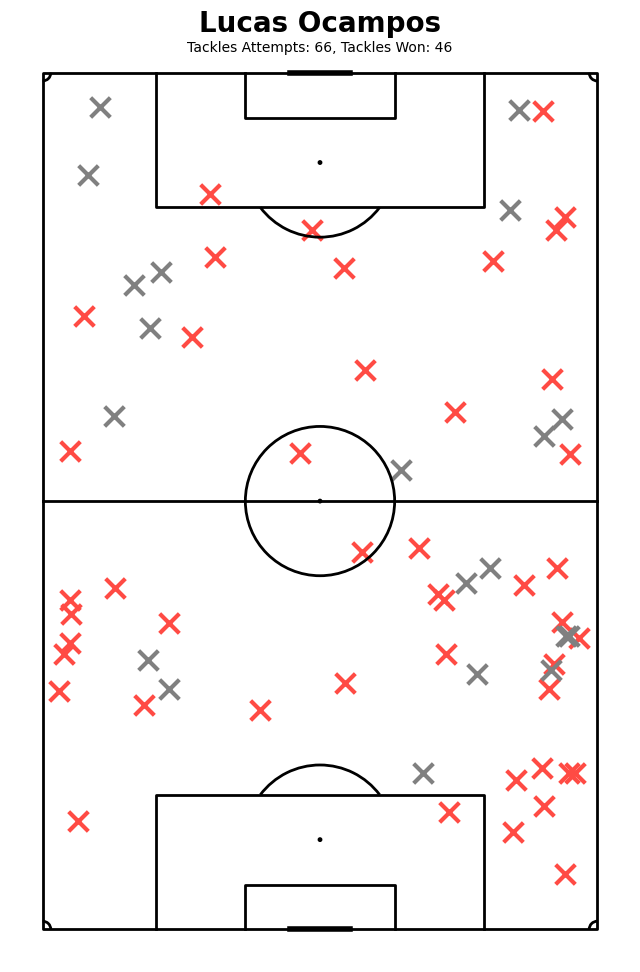

In [66]:
def plot_top_tacklers(ax,pname):
    dfp = df[df['name']==pname]
    tks = dfp[(dfp['type']=='Tackle') & (dfp['outcomeType']=='Successful')]
    tku = dfp[(dfp['type']=='Tackle') & (dfp['outcomeType']=='Unsuccessful')]
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='w', line_color=line_color, linewidth=2, corner_arcs=True, line_zorder=5)
    pitch.draw(ax=ax)
    ax.scatter(tks.y, tks.x, s=200, color=col1, marker='x', lw=3, zorder=3)
    ax.scatter(tku.y, tku.x, s=200, color='gray', marker='x', lw=3, zorder=3)
    ax.set_title(f'{pname}', fontsize=20, fontweight='bold')
    ax.text(34, 108, f'Tackles Attempts: {len(tks)+len(tku)}, Tackles Won: {len(tks)}', fontsize=10, ha='center', va='center')

fig,ax=plt.subplots(figsize=(8,12))
plot_top_tacklers(ax,'Lucas Ocampos')